In [1]:
Sys.setlocale("LC_ALL", 'Persian')

[1] "LC_COLLATE=Persian_Iran.1256;LC_CTYPE=Persian_Iran.1256;LC_MONETARY=Persian_Iran.1256;LC_NUMERIC=C;LC_TIME=Persian_Iran.1256"

In [2]:
options(scipen=999)

In [3]:
# install.packages('kknn')

In [4]:
library(plyr)
library(caret)
library(class)
library(forecast)
library(KernelKnn)
library(kknn)

Warning message:
"package 'caret' was built under R version 3.6.3"Loading required package: lattice
Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'class' was built under R version 3.6.3"Warning message:
"package 'forecast' was built under R version 3.6.3"Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
Warning message:
"package 'KernelKnn' was built under R version 3.6.3"Warning message:
"package 'kknn' was built under R version 3.6.3"
Attaching package: 'kknn'

The following object is masked from 'package:caret':

    contr.dummy



In [5]:
data = readxl::read_excel(path = 'E:\\Term 7\\Data Mining\\Ex2\\KNN\\Iran_Maskan_koll9904.xlsx')

In [6]:
head(data)

کد قرارداد,نوع قرارداد,استان,شهرستان,نوع ملک,منطقه شهرداری,نوع کاربری,مساحت,درصد,قیمت,قیمت یک مترمربع,عمر بنا,نوع اسکلت,تاریخ ثبت قرارداد,شش رقم نخست کد پستی
19136381,مبايعه نامه,زنجان,ابهر,دستگاه آپارتمان,NA,مسکوني,83.00,100,3000000,36144.58,15,فلزي,1399/04/14,456179
19140513,مبايعه نامه,زنجان,ابهر,دستگاه آپارتمان,NA,مسکوني,90.00,100,1080000,12000.00,9,فلزي,1399/04/15,456615
19192568,مبايعه نامه,زنجان,ابهر,دستگاه آپارتمان,NA,مسکوني,49.00,100,10000000,204081.63,10,بتوني,1399/04/23,456173
19202902,مبايعه نامه,زنجان,ابهر,دستگاه آپارتمان,NA,مسکوني,80.92,100,3240000,40039.55,9,فلزي,1399/04/24,456194
19203171,مبايعه نامه,زنجان,ابهر,دستگاه آپارتمان,NA,مسکوني,80.00,100,750000,9375.00,10,بتوني,1399/04/24,456618
19052240,مبايعه نامه,مرکزي,اراك,دستگاه آپارتمان,NA,مسکوني,100.00,100,5500000,55000.00,0,بتوني,1399/04/01,381333


In [7]:
str(data)

tibble [43,133 x 15] (S3: tbl_df/tbl/data.frame)
 $ کد قرارداد         : chr [1:43133] "19136381" "19140513" "19192568" "19202902" ...
 $ نوع قرارداد        : chr [1:43133] "مبايعه نامه" "مبايعه نامه" "مبايعه نامه" "مبايعه نامه" ...
 $ استان              : chr [1:43133] "زنجان" "زنجان" "زنجان" "زنجان" ...
 $ شهرستان            : chr [1:43133] "ابهر" "ابهر" "ابهر" "ابهر" ...
 $ نوع ملک            : chr [1:43133] "دستگاه آپارتمان" "دستگاه آپارتمان" "دستگاه آپارتمان" "دستگاه آپارتمان" ...
 $ منطقه شهرداري      : num [1:43133] NA NA NA NA NA NA NA NA NA 4 ...
 $ نوع کاربري         : chr [1:43133] "مسکوني" "مسکوني" "مسکوني" "مسکوني" ...
 $ مساحت              : num [1:43133] 83 90 49 80.9 80 ...
 $ درصد               : chr [1:43133] "100" "100" "100" "100" ...
 $ قيمت               : num [1:43133] 3000000 1080000 10000000 3240000 750000 ...
 $ قيمت يک مترمربع    : chr [1:43133] "36144.58" "12000.00" "204081.63" "40039.55" ...
 $ عمر بنا            : num [1:43133] 15 9 10 9 10 0 1 6 19 0 ...


In [8]:
dim(data)

[1] 43133    15

In [9]:
names(data)[1] = 'contrat_number'
names(data)[2] = 'contract_type'
names(data)[3] = 'state'
names(data)[4] = 'city'
names(data)[5] = 'property_type'
names(data)[6] = 'district_number'
names(data)[7] = 'usage_type'
names(data)[8] = 'area'
names(data)[9] = 'percentage'
names(data)[10] = 'price'
names(data)[11] = 'price_per_square'
names(data)[12] = 'building_age'
names(data)[13] = 'skeleton_type'
names(data)[14] = 'contract_date'
names(data)[15] = 'postal_code'
data = data[!is.na(data$contrat_number),]
data$percentage = as.numeric(data$percentage)
data$price = ((as.numeric(data$price) / 10000) * data$percentage) / 100
data$price_per_square = as.numeric(data$price_per_square) / 10000

In [10]:
khoozestan = data[data$state == 'خوزستان',]

In [11]:
head(khoozestan)

contrat_number,contract_type,state,city,property_type,district_number,usage_type,area,percentage,price,price_per_square,building_age,skeleton_type,contract_date,postal_code
19048971,مبايعه نامه,خوزستان,اهواز,دستگاه آپارتمان,NA,مسکوني,75.00,100,195,2.600000,2,بدون اسکلت,1399/04/01,617563
19052727,مبايعه نامه,خوزستان,اهواز,دستگاه آپارتمان,2,مسکوني,96.30,100,735,7.632399,13,فلزي,1399/04/01,191181
19056655,مبايعه نامه,خوزستان,اهواز,دستگاه آپارتمان,8,مسکوني,111.60,100,585,5.241935,8,بتوني,1399/04/02,618493
19060434,مبايعه نامه,خوزستان,اهواز,دستگاه آپارتمان,4,مسکوني,13313.00,100,400,0.030046,11,فلزي,1399/04/02,613668
19061836,مبايعه نامه,خوزستان,اهواز,دستگاه آپارتمان,5,مسکوني,80.48,100,285,3.541252,11,بتوني و فلزي,1399/04/02,613495
19061854,مبايعه نامه,خوزستان,اهواز,دستگاه آپارتمان,3,مسکوني,72.22,100,500,6.923290,9,بتوني و فلزي,1399/04/02,617763


In [12]:
summary(khoozestan)

 contrat_number     contract_type         state               city          
 Length:768         Length:768         Length:768         Length:768        
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
 property_type      district_number   usage_type             area         
 Length:768         Min.   : 1.000   Length:768         Min.   :    1.00  
 Class :character   1st Qu.: 2.000   Class :character   1st Qu.:   76.15  
 Mode  :character   Median : 2.000   Mode  :character   Median :   90.00  
                    Mean   : 2.492                      Mean   :  323.55  
         

#### 1:contrat_number:no_use
#### 2:contract_type:all_same
#### 3:state:all_same
#### 5:property_type:all_same
#### 6:district_number:522 NA out of 768 records
#### 7:usage_type:all_same
#### 9:percentage:multiplied_in_price
#### 11:price_per_square:should not be used in prediction
#### 14:contract_date:no_use

In [13]:
khoozestan = khoozestan[-c(1,2,3,5,6,7,9,11,14)]

In [14]:
head(khoozestan)

city,area,price,building_age,skeleton_type,postal_code
اهواز,75.00,195,2,بدون اسکلت,617563
اهواز,96.30,735,13,فلزي,191181
اهواز,111.60,585,8,بتوني,618493
اهواز,13313.00,400,11,فلزي,613668
اهواز,80.48,285,11,بتوني و فلزي,613495
اهواز,72.22,500,9,بتوني و فلزي,617763


In [15]:
khoozestan$city = mapvalues(khoozestan$city, 
          from=c('اهواز','ايذه','آبادان',unique(khoozestan$city)[4],'بندر ماهشهر','بهبهان','چمران','خرمشهر','دزفول','رامشير','شوش','شوشتر','شيبان','مسجد سليمان','هنديجان'), 
          to=c('ahvaz','izeh','abadan','bandare_emam_khomeini','bandare_mahshahr','behbahan','chamran',
               'khorramshahr','dezfool','raamshir','shoosh','shooshtar','shiban','masjed_soleiman','handijan'))

In [16]:
khoozestan$skeleton_type = mapvalues(khoozestan$skeleton_type, 
          from=c(unique(khoozestan$skeleton_type)[1],unique(khoozestan$skeleton_type)[2],unique(khoozestan$skeleton_type)[3],unique(khoozestan$skeleton_type)[4],unique(khoozestan$skeleton_type)[5],unique(khoozestan$skeleton_type)[6]), 
          to=c('none','metal','concrete','metal_concrete','brick_or_cement_block','adobe_or_clay'))

In [17]:
head(khoozestan)

city,area,price,building_age,skeleton_type,postal_code
ahvaz,75.00,195,2,none,617563
ahvaz,96.30,735,13,metal,191181
ahvaz,111.60,585,8,concrete,618493
ahvaz,13313.00,400,11,metal,613668
ahvaz,80.48,285,11,metal_concrete,613495
ahvaz,72.22,500,9,metal_concrete,617763


In [18]:
dim(khoozestan)

[1] 768   6

In [19]:
dummy_khoozestan = data.frame(predict(dummyVars(~.,khoozestan),khoozestan))

In [20]:
names(dummy_khoozestan)

[1] "cityabadan"                         "cityahvaz"                         
  [3] "citybandare_emam_khomeini"          "citybandare_mahshahr"              
  [5] "citybehbahan"                       "citychamran"                       
  [7] "citydezfool"                        "cityhandijan"                      
  [9] "cityizeh"                           "citykhorramshahr"                  
 [11] "citymasjed_soleiman"                "cityraamshir"                      
 [13] "cityshiban"                         "cityshoosh"                        
 [15] "cityshooshtar"                      "area"                              
 [17] "price"                              "building_age"                      
 [19] "skeleton_typeadobe_or_clay"         "skeleton_typebrick_or_cement_block"
 [21] "skeleton_typeconcrete"              "skeleton_typemetal"                
 [23] "skeleton_typemetal_concrete"        "skeleton_typenone"                 
 [25] "postal_code181757"                  "postal_code191181"                 
 [27] "postal_code613373"                  "postal_code613388"                 
 [29] "postal_code613493"                  "postal_code613495"                 
 [31] "postal_code613664"                  "postal_code613668"                 
 [33] "postal_code613669"                  "postal_code613674"                 
 [35] "postal_code613682"                  "postal_code613691"                 
 [37] "postal_code613697"                  "postal_code613761"                 
 [39] "postal_code613783"                  "postal_code613858"                 
 [41] "postal_code613865"                  "postal_code613866"                 
 [43] "postal_code613868"                  "postal_code613873"                 
 [45] "postal_code613877"                  "postal_code613881"                 
 [47] "postal_code613968"                  "postal_code613975"                 
 [49] "postal_code614398"                  "postal_code614464"                 
 [51] "postal_code614497"                  "postal_code614498"                 
 [53] "postal_code614818"                  "postal_code615167"                 
 [55] "postal_code615377"                  "postal_code615381"                 
 [57] "postal_code615458"                  "postal_code615468"                 
 [59] "postal_code615488"                  "postal_code615568"                 
 [61] "postal_code615569"                  "postal_code615573"                 
 [63] "postal_code615574"                  "postal_code615583"                 
 [65] "postal_code615591"                  "postal_code615896"                 
 [67] "postal_code616388"                  "postal_code616394"                 
 [69] "postal_code616395"                  "postal_code616396"                 
 [71] "postal_code616397"                  "postal_code616463"                 
 [73] "postal_code616464"                  "postal_code616478"                 
 [75] "postal_code616488"                  "postal_code616571"                 
 [77] "postal_code616576"                  "postal_code617563"                 
 [79] "postal_code617596"                  "postal_code617763"                 
 [81] "postal_code617781"                  "postal_code617797"                 
 [83] "postal_code618389"                  "postal_code618397"                 
 [85] "postal_code618398"                  "postal_code618484"                 
 [87] "postal_code618491"                  "postal_code618493"                 
 [89] "postal_code618576"                  "postal_code618761"                 
 [91] "postal_code618763"                  "postal_code618776"                 
 [93] "postal_code618783"                  "postal_code619587"                 
 [95] "postal_code619595"                  "postal_code619767"                 
 [97] "postal_code619785"                  "postal_code631131"                 
 [99] "postal_code631158"                  "postal_code631316"                 
[1

In [21]:
str(dummy_khoozestan)

'data.frame':	768 obs. of  327 variables:
 $ cityabadan                        : num  0 0 0 0 0 0 0 0 0 0 ...
 $ cityahvaz                         : num  1 1 1 1 1 1 1 1 1 1 ...
 $ citybandare_emam_khomeini         : num  0 0 0 0 0 0 0 0 0 0 ...
 $ citybandare_mahshahr              : num  0 0 0 0 0 0 0 0 0 0 ...
 $ citybehbahan                      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ citychamran                       : num  0 0 0 0 0 0 0 0 0 0 ...
 $ citydezfool                       : num  0 0 0 0 0 0 0 0 0 0 ...
 $ cityhandijan                      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ cityizeh                          : num  0 0 0 0 0 0 0 0 0 0 ...
 $ citykhorramshahr                  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ citymasjed_soleiman               : num  0 0 0 0 0 0 0 0 0 0 ...
 $ cityraamshir                      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ cityshiban                        : num  0 0 0 0 0 0 0 0 0 0 ...
 $ cityshoosh                        : num  0 0 0 0 0 0 0 0 0 0 ...
 $ cit

In [22]:
normalize <- function(x){
                    return ((x-min(x))/(max(x)-(min(x))))
            }

In [23]:
normalize(c(1,2,3,4,5))

[1] 0.00 0.25 0.50 0.75 1.00

In [24]:
# X = dummy_khoozestan[-c(17)]

In [25]:
# names(X)

In [26]:
# names(dummy_khoozestan)

In [28]:
set.seed(313)

In [29]:
train_index = sample.int(nrow(dummy_khoozestan),0.8*nrow(dummy_khoozestan),replace=F)

X = as.data.frame(lapply(dummy_khoozestan[,-c(17)],normalize))
Y = dummy_khoozestan['price']

x_train = X[train_index,]
y_train = Y[train_index,]
train = cbind(x_train,y_train)

x_test = X[-train_index,]
y_test = Y[-train_index,]
test = cbind(x_test,y_test)

In [30]:
nrow(Y) == nrow(X)

[1] TRUE

In [31]:
summary(x_train)

   cityabadan       cityahvaz       citybandare_emam_khomeini
 Min.   :0.0000   Min.   :0.00000   Min.   :0.0000           
 1st Qu.:0.0000   1st Qu.:0.00000   1st Qu.:0.0000           
 Median :0.0000   Median :0.00000   Median :0.0000           
 Mean   :0.4577   Mean   :0.09935   Mean   :0.1173           
 3rd Qu.:1.0000   3rd Qu.:0.00000   3rd Qu.:0.0000           
 Max.   :1.0000   Max.   :1.00000   Max.   :1.0000           
 citybandare_mahshahr  citybehbahan       citychamran       citydezfool    
 Min.   :0.000        Min.   :0.000000   Min.   :0.00000   Min.   :0.0000  
 1st Qu.:0.000        1st Qu.:0.000000   1st Qu.:0.00000   1st Qu.:0.0000  
 Median :0.000        Median :0.000000   Median :0.00000   Median :0.0000  
 Mean   :0.215        Mean   :0.001629   Mean   :0.06026   Mean   :0.0114  
 3rd Qu.:0.000        3rd Qu.:0.000000   3rd Qu.:0.00000   3rd Qu.:0.0000  
 Max.   :1.000        Max.   :1.000000   Max.   :1.00000   Max.   :1.0000  
  cityhandijan         cityizeh   

In [32]:
names(train)

[1] "cityabadan"                         "cityahvaz"                         
  [3] "citybandare_emam_khomeini"          "citybandare_mahshahr"              
  [5] "citybehbahan"                       "citychamran"                       
  [7] "citydezfool"                        "cityhandijan"                      
  [9] "cityizeh"                           "citykhorramshahr"                  
 [11] "citymasjed_soleiman"                "cityraamshir"                      
 [13] "cityshiban"                         "cityshoosh"                        
 [15] "cityshooshtar"                      "area"                              
 [17] "building_age"                       "skeleton_typeadobe_or_clay"        
 [19] "skeleton_typebrick_or_cement_block" "skeleton_typeconcrete"             
 [21] "skeleton_typemetal"                 "skeleton_typemetal_concrete"       
 [23] "skeleton_typenone"                  "postal_code181757"                 
 [25] "postal_code191181"                  "postal_code613373"                 
 [27] "postal_code613388"                  "postal_code613493"                 
 [29] "postal_code613495"                  "postal_code613664"                 
 [31] "postal_code613668"                  "postal_code613669"                 
 [33] "postal_code613674"                  "postal_code613682"                 
 [35] "postal_code613691"                  "postal_code613697"                 
 [37] "postal_code613761"                  "postal_code613783"                 
 [39] "postal_code613858"                  "postal_code613865"                 
 [41] "postal_code613866"                  "postal_code613868"                 
 [43] "postal_code613873"                  "postal_code613877"                 
 [45] "postal_code613881"                  "postal_code613968"                 
 [47] "postal_code613975"                  "postal_code614398"                 
 [49] "postal_code614464"                  "postal_code614497"                 
 [51] "postal_code614498"                  "postal_code614818"                 
 [53] "postal_code615167"                  "postal_code615377"                 
 [55] "postal_code615381"                  "postal_code615458"                 
 [57] "postal_code615468"                  "postal_code615488"                 
 [59] "postal_code615568"                  "postal_code615569"                 
 [61] "postal_code615573"                  "postal_code615574"                 
 [63] "postal_code615583"                  "postal_code615591"                 
 [65] "postal_code615896"                  "postal_code616388"                 
 [67] "postal_code616394"                  "postal_code616395"                 
 [69] "postal_code616396"                  "postal_code616397"                 
 [71] "postal_code616463"                  "postal_code616464"                 
 [73] "postal_code616478"                  "postal_code616488"                 
 [75] "postal_code616571"                  "postal_code616576"                 
 [77] "postal_code617563"                  "postal_code617596"                 
 [79] "postal_code617763"                  "postal_code617781"                 
 [81] "postal_code617797"                  "postal_code618389"                 
 [83] "postal_code618397"                  "postal_code618398"                 
 [85] "postal_code618484"                  "postal_code618491"                 
 [87] "postal_code618493"                  "postal_code618576"                 
 [89] "postal_code618761"                  "postal_code618763"                 
 [91] "postal_code618776"                  "postal_code618783"                 
 [93] "postal_code619587"                  "postal_code619595"                 
 [95] "postal_code619767"                  "postal_code619785"                 
 [97] "postal_code631131"                  "postal_code631158"                 
 [99] "postal_code631316"                  "postal_code631363"                 
[1

In [33]:
dim(cbind(x_train,y_train))

[1] 614 327

In [34]:
# sqrt(nrow(train))

In [35]:
# ?train

In [36]:
# names(train)

In [37]:
prettySeq <- function(x) paste("Resample", gsub(" ", "0", format(seq(along = x))), sep = "")

createRandomDataPartition <- function(y, times, p) {
  vec <- 1:length(y)
  n_samples <- round(p * length(y))
  
  result <- list()
  for(t in 1:times){
    indices <- sample(vec, n_samples, replace = FALSE)
    result[[t]] <- indices
    #names(result)[t] <- paste0("Resample", t)
  }
  names(result) <- prettySeq(result)
  result
}

In [38]:
createRandomDataPartition(y=1:10 , time=5 , p=0.6)

$Resample1
[1] 9 4 2 5 3 7

$Resample2
[1]  3  1  6  7 10  5

$Resample3
[1]  1  5  7  6 10  2

$Resample4
[1]  6 10  4  8  2  9

$Resample5
[1] 4 8 9 5 1 2

In [39]:
set.seed(1234)
n_repeats <- 20
train_fraction <- 0.8

parts <- createRandomDataPartition(1:nrow(train), times = n_repeats, p = train_fraction)

ctrl <- trainControl(method = "repeatedcv",  ## The method doesn't matter
                     index= parts, 
                     savePredictions = TRUE
                     ) 

In [40]:
m1 <- train(y_train ~. ,
            tuneGrid = expand.grid(k=1:30),
            data = train,
            metric = 'MAE',
            method = 'knn',
            trControl = ctrl)
     
#          preProc= c('center'))

In [41]:
m1

k-Nearest Neighbors 

614 samples
326 predictors

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 1 times) 
Summary of sample sizes: 491, 491, 491, 491, 491, 491, ... 
Resampling results across tuning parameters:

  k   RMSE      Rsquared   MAE     
   1  295.9929  0.1371818  185.2124
   2  264.8218  0.1703314  174.5649
   3  249.6771  0.2182988  165.7721
   4  249.4402  0.2115939  165.4578
   5  246.9486  0.2100887  163.8605
   6  245.3673  0.2166829  163.3118
   7  246.0461  0.2079222  163.9413
   8  246.7112  0.2002395  164.6784
   9  247.0609  0.1976539  165.8000
  10  247.8849  0.1907857  167.0615
  11  249.0790  0.1828342  167.8993
  12  249.4082  0.1805639  168.6234
  13  250.0844  0.1768484  169.8711
  14  250.0874  0.1788288  170.4537
  15  249.9776  0.1782771  170.6001
  16  251.6690  0.1685201  171.7831
  17  251.2107  0.1692580  171.8539
  18  251.8960  0.1663435  172.4794
  19  251.6729  0.1642199  172.5186
  20  251.9242  0.1586018  172.6902
  21  252.014

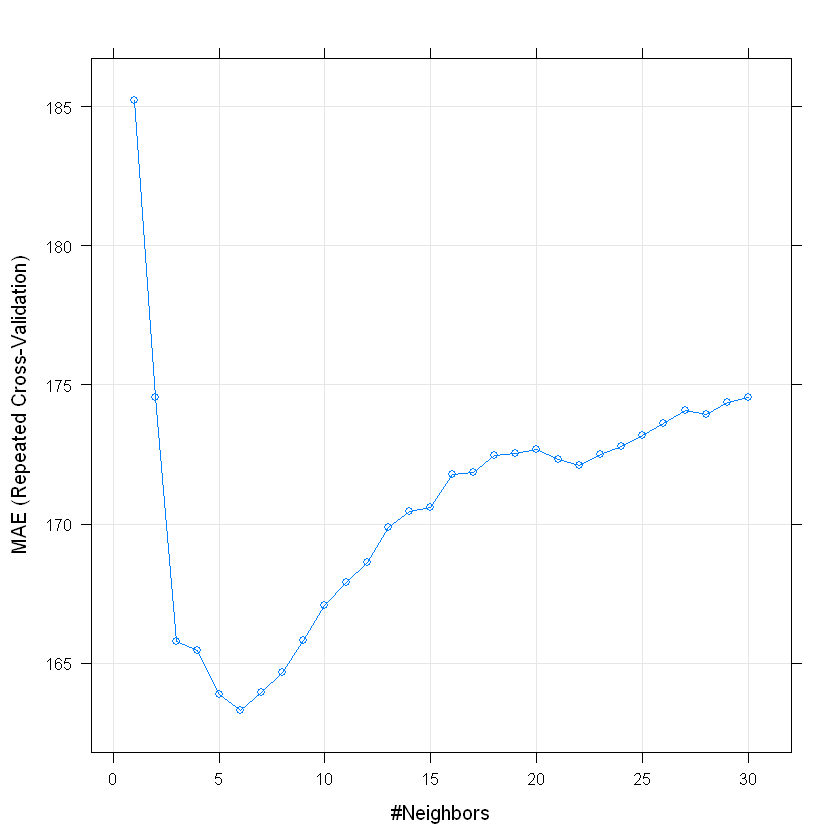

In [42]:
plot(m1)

In [43]:
accuracy(predict(m1,x_test),y_test)

,ME,RMSE,MAE,MPE,MAPE
Test set,5.843856,277.2868,182.0896,-2107.498,2131.766


In [45]:
accuracy(predict(m1,x_train),y_train)

,ME,RMSE,MAE,MPE,MAPE
Test set,3.571312,215.8699,141.8148,-4819.535,4840.359


In [92]:
# m1 = caret::knnreg(x_train,y_train,k=1)

In [93]:
# accuracy(predict(m1,x_train),y_train)

In [94]:
# m2 = FNN::knn.reg(train=x_train, y=y_train, test=x_test[1,],  k = 3)

In [293]:
# x_test

In [95]:
# normalize <- function(x_train,x_test,){
#                     return ((x-min(x))/(max(x)-(min(x))))
#             }

In [96]:
# x_train

In [97]:
# x_train[which(rownames(x_train) %in% c('393','263','171')),] 

In [142]:
weighted_average.knn <- function(x_train,x_test,y_train,k){
    
        df = FNN::knnx.index(data = x_train , query=x_test , k=k)
        values = data.frame(1:nrow(x_test))
        for(var in 1:k)
         {
          values = cbind(values,y_train[df[,var]])
         }
        values = values[-c(1)]
        dist = FNN::knnx.dist(data = x_train , query=x_test , k=k)
        weights = 1/dist
        print(as.data.frame(rowSums(weights)))
        return (rowSums(values * weights)) / as.data.frame(rowSums(weights))

        }

In [144]:
# weighted_average(x_train,x_test,y_train,k=21)

In [146]:
# head(dist)

In [145]:
# head(weights)

In [129]:
# values = data.frame(1:nrow(x_test))
# for(var in 1:3)
#  {
#   values = cbind(values,y_train[df[,var]])
#  }
# values = values[-c(1)]

In [128]:
# values[-c(1)]

In [127]:
# x_train[c(393,263,171),]

In [126]:
# y_train[c(393,263,171)]

In [125]:
# FNN::knn.reg(train = x_train , test = x_test[1,], y=y_train , k=3)

In [124]:
# df = as.data.frame(FNN::knnx.index(data = x_train , query=x_test , k=3))

In [123]:
# dist = FNN::knnx.dist(data = x_train , query=x_test , k=3)

In [122]:
# weights = 1/dist

In [121]:
# values = cbind(y_train[df[,1]],y_train[df[,2]],y_train[df[,3]])

In [120]:
# head(weights)

In [119]:
# head(values)

In [118]:
# head(rowSums(values))

In [117]:
# as.data.frame(rowSums(values * weights)) / as.data.frame(rowSums(weights))

In [116]:
# gushim khamush shod
# aha, hale, eb nadare
# khordi?
# re azizam
# noshe jan
# man ye package test kardam javab ndad, ydone dg ham alan test mikonm
# vali chizi ke ajibe engar kheili kame in qazie
# ham kolan knn regression
# va badtar az on, weighted esh
# ahan
# berim bznim?
# ay gozooo


In [115]:
# ?train

In [114]:
# m3 <- train(y_train ~. ,
# #      k=1,
#      tuneGrid = expand.grid(k=20:30),
#      data = train,
#      method = 'knn')

In [113]:
# m3

In [112]:
# accuracy(predict(m3,x_test),y_test)

In [111]:
# accuracy(weighted_average(x_train,x_test,y_train,27)[,1],y_test)

In [110]:
# m2 = class::knn(train=x_train , test=x_train , k=25 , cl=y_train)

In [69]:
# predict(m2,x_train)

In [109]:
# accuracy(as.numeric(m2) , y_train )

In [108]:
# accuracy(as.numeric(m2) , y_test )

In [107]:
# m2 = class::knn(train = x_train , test=x_test , cl=y_train , k=1)

In [106]:
# accuracy(as.numeric(m2) , y_test)

In [105]:
# train

In [104]:
# y_test_pred = predict(m1,x_test)

In [103]:
# plot(y_test_pred , y_test)

In [102]:
# kknn(formula = y_train ~ ., train = train, test = x_test, distance = 1, kernel = "triangular")

In [101]:
# m5 = KernelKnn(data = x_train , y = y_train, TEST_data  = x_test , k=1 , regression = T,  weights_function = 'inverse')

In [100]:
# accuracy(m5,y_test)

In [3]:
train

ERROR: Error in eval(expr, envir, enclos): object 'train' not found


In [99]:
# cor(y_test_pred,y_test)

In [98]:
# y_test_pred